In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import scipy.stats as stat
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('data.csv').set_index('date').dropna()

up = [0]
for i in range(1,len(df)):
    if df['close'].iloc[i] > df['close'].iloc[i-1] :
        up.append(1)
    else :
        up.append(0)
df['up'] = up

In [3]:
df = df.drop(columns = ['open', 'high', 'low', 'rsi_14', 'macd', 'SMI','CCI', 'william_a/d','ATR','ath'])

In [6]:
df = df.drop(columns = 'up')

In [7]:
df[3000:].corr(method = 'spearman')['close']

close                 1.000000
new_adress            0.563986
sopr                  0.593515
comp_ribbon           0.161640
utxo                  0.421118
transac_sec           0.200501
mvrv_z                0.956617
nvts                  0.587256
pct_profit            0.920965
supp_last_act         0.078984
sp                    0.028086
active_adress         0.594761
fees_total            0.463938
hash_rate             0.648565
transactions_count    0.200501
utxo_spent            0.470628
Name: close, dtype: float64

<AxesSubplot:>

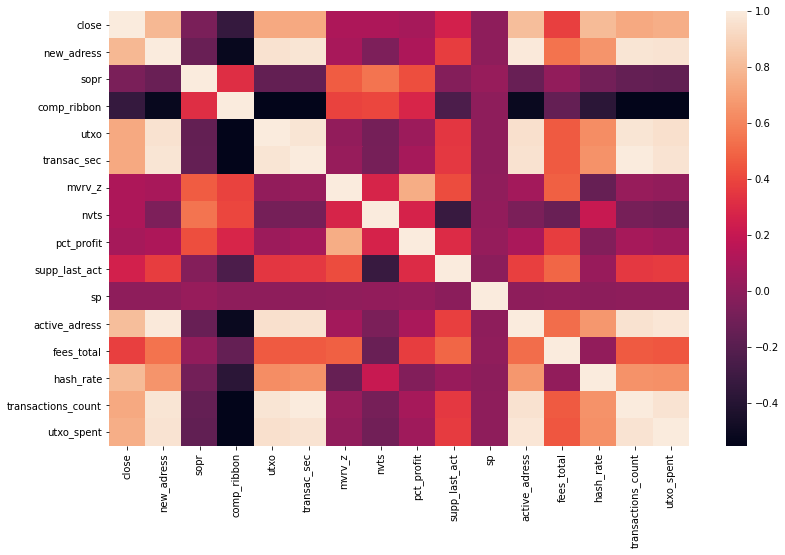

In [8]:
plt.figure(figsize = (13,8))
sn.heatmap(df.corr())

In [66]:
columns = ['close','rsi_14', 'macd', 'william_a/d', 'ATR', 'ath', 'new_adress', 'sopr', 'utxo', 'transac_sec', 'mvrv_z', 'nvts', 'pct_profit', 'active_adress', 'hash_rate', 'transactions_count','utxo_spent','up']

In [68]:
df = df[columns]

In [61]:
log_columns = ['close', 'william_a/d', 'ATR', 'new_adress', 'utxo', 'transac_sec', 'active_adress', 'hash_rate', 'transactions_count','utxo_spent']

In [64]:
for i in log_columns : 
    df[i] = df[i].map(lambda x : np.log(x))

/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [71]:
df.to_csv('data_2.csv')

In [73]:
df = pd.read_csv('data_2.csv').set_index('date')

In [85]:
df.iloc[3690] 

close                  9.286154
rsi_14                50.273854
macd                 -38.430162
william_a/d            9.778094
ATR                    5.555834
ath                    0.544501
new_adress            13.188312
sopr                   1.001162
utxo                  13.804966
transac_sec            1.402542
mvrv_z                 1.283698
nvts                  34.337867
pct_profit             0.848218
active_adress         13.927878
hash_rate             46.452957
transactions_count    12.769285
utxo_spent            13.782574
up                     0.000000
Name: 2020-09-30, dtype: float64

In [87]:
df.iloc[2610 : 3690]

,close,rsi_14,macd,william_a/d,ATR,ath,new_adress,sopr,utxo,transac_sec,mvrv_z,nvts,pct_profit,active_adress,hash_rate,transactions_count,utxo_spent,up
date,,,,,,,,,,,,,,,,,,
2017-10-16,8.657199,77.333567,422.357956,8.972524,5.527751,0.984786,13.013920,1.025728,13.597714,1.292159,5.102435,13.050973,0.996302,13.653035,43.784360,12.658902,13.503167,1
2017-10-17,8.629407,71.353123,425.289616,8.950394,5.541694,0.957794,13.071983,1.013959,13.643988,1.352973,4.980216,12.745173,0.967109,13.680757,43.723863,12.719716,13.519902,0
2017-10-18,8.625923,70.627277,421.188072,8.946814,5.630597,0.954463,13.042075,1.010284,13.638067,1.338370,4.642390,12.144628,0.968012,13.615607,43.666199,12.705113,13.452565,0
2017-10-19,8.648365,72.580772,423.266873,8.969297,5.630434,0.976125,13.096350,1.028433,13.698958,1.418207,4.905271,12.610886,0.989204,13.721370,43.780697,12.784950,13.626404,1
2017-10-20,8.699089,76.523259,443.734609,9.016240,5.710238,0.989497,12.959844,1.018624,13.614852,1.284752,5.022908,12.803671,0.995915,13.653270,43.815799,12.651495,13.562901,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,9.278213,48.652395,-98.217749,9.773112,5.796946,0.540194,13.192486,1.002471,13.797895,1.407200,1.270902,34.308266,0.835191,13.953621,46.526477,12.773943,13.863687,0
2020-09-26,9.283074,49.632094,-84.216308,9.777148,5.754490,0.542826,12.979262,1.001506,13.564641,1.161457,1.282802,34.407461,0.847494,13.765736,46.418109,12.528200,13.774049,1
2020-09-27,9.284931,50.025708,-70.692205,9.784342,5.712788,0.543835,12.881293,1.000763,13.498850,1.098728,1.281136,34.460997,0.850047,13.575756,46.436527,12.465471,13.460426,1


In [93]:
df.iloc[1515 : 2610]

,close,rsi_14,macd,william_a/d,ATR,ath,new_adress,sopr,utxo,transac_sec,mvrv_z,nvts,pct_profit,active_adress,hash_rate,transactions_count,utxo_spent,up
date,,,,,,,,,,,,,,,,,,
2014-10-17,5.948194,47.947696,-8.768759,6.783934,3.379364,0.329475,11.589294,0.984632,12.244355,-0.200585,0.183907,20.894776,0.526941,12.121212,40.030971,11.166158,12.232909,0
2014-10-18,5.968078,50.821446,-7.145063,6.799307,3.324697,0.336091,11.394018,1.003019,12.219196,-0.264602,0.208391,21.205178,0.533127,12.073735,40.180336,11.102141,12.098075,1
2014-10-19,5.962488,49.980156,-5.965249,6.793114,3.186819,0.334218,11.355019,1.000164,12.598449,-0.313918,0.227331,21.546682,0.528576,12.349350,39.984704,11.052825,12.151564,0
2014-10-20,5.943735,47.191568,-5.548792,6.783998,3.074307,0.328009,11.618132,0.995316,12.354583,-0.045426,0.199391,21.191433,0.512128,12.208081,39.985864,11.321317,12.345504,0
2014-10-21,5.955439,49.093684,-4.801157,6.791117,3.049134,0.331870,11.698990,0.995846,12.382066,-0.058409,0.207449,21.322564,0.526604,12.250448,40.089236,11.308334,12.370900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-11,8.479922,67.694463,183.661618,8.822963,5.155865,0.968403,12.948191,1.012544,13.530914,1.218861,4.189253,11.411702,0.986847,13.567353,43.497033,12.585604,13.402164,1
2017-10-12,8.598083,77.133310,244.251132,8.909133,5.332710,0.998341,12.958858,1.025523,13.493630,1.221222,4.588738,12.088233,1.000000,13.571654,43.578667,12.587965,13.457775,1
2017-10-13,8.634514,79.301549,304.983820,8.938865,5.410035,0.966083,13.014669,1.042172,13.611268,1.276562,5.209769,13.156026,0.989916,13.616012,43.476999,12.643304,13.344739,1


In [94]:
df.iloc[2610 : 2700]

,close,rsi_14,macd,william_a/d,ATR,ath,new_adress,sopr,utxo,transac_sec,mvrv_z,nvts,pct_profit,active_adress,hash_rate,transactions_count,utxo_spent,up
date,,,,,,,,,,,,,,,,,,
2017-10-16,8.657199,77.333567,422.357956,8.972524,5.527751,0.984786,13.013920,1.025728,13.597714,1.292159,5.102435,13.050973,0.996302,13.653035,43.784360,12.658902,13.503167,1
2017-10-17,8.629407,71.353123,425.289616,8.950394,5.541694,0.957794,13.071983,1.013959,13.643988,1.352973,4.980216,12.745173,0.967109,13.680757,43.723863,12.719716,13.519902,0
2017-10-18,8.625923,70.627277,421.188072,8.946814,5.630597,0.954463,13.042075,1.010284,13.638067,1.338370,4.642390,12.144628,0.968012,13.615607,43.666199,12.705113,13.452565,0
2017-10-19,8.648365,72.580772,423.266873,8.969297,5.630434,0.976125,13.096350,1.028433,13.698958,1.418207,4.905271,12.610886,0.989204,13.721370,43.780697,12.784950,13.626404,1
2017-10-20,8.699089,76.523259,443.734609,9.016240,5.710238,0.989497,12.959844,1.018624,13.614852,1.284752,5.022908,12.803671,0.995915,13.653270,43.815799,12.651495,13.562901,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-09,9.576057,47.580084,295.951052,9.725793,7.318328,0.727615,13.332958,1.011009,13.895522,1.427397,4.842928,12.246300,0.833953,13.955547,44.203635,12.794140,13.605059,0
2018-01-10,9.605774,49.672299,241.487776,9.801815,7.292065,0.749563,13.276937,1.005513,13.851689,1.390991,4.464505,11.617264,0.873369,13.933619,44.215142,12.757734,13.635683,1
2018-01-11,9.496329,43.111425,73.255441,9.708583,7.295008,0.671857,13.220979,1.009586,13.787578,1.363366,4.170154,11.157934,0.781412,14.017602,44.362424,12.730109,13.845490,0
